In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [10]:
def Timsort(array, K):
    # insertion sort 
    if(len(array) <= K):
        for step in range(1, len(array)):
            key = array[step]
            j = step - 1
            
            # Compare key with each element on the left of it until an element smaller than it is found
            # For descending order, change key<array[j] to key>array[j].        
            while j >= 0 and key < array[j]:
                array[j + 1] = array[j]
                j = j - 1
            
            # Place key at after the element just smaller than it.
            array[j + 1] = key

    # merge sort
    elif len(array) > 1:

        #  r is the point where the array is divided into two subarrays
        r = len(array)//2
        L = array[:r]
        M = array[r:]

        # Sort the two halves
        Timsort(L,K)
        Timsort(M,K)

        i = j = k = 0

        # Until we reach either end of either L or M, pick larger among
        # elements L and M and place them in the correct position at A[p..r]
        while i < len(L) and j < len(M):
            if L[i] < M[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1

        # When we run out of elements in either L or M,
        # pick up the remaining elements and put in A[p..r]
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            array[k] = M[j]
            j += 1
            k += 1

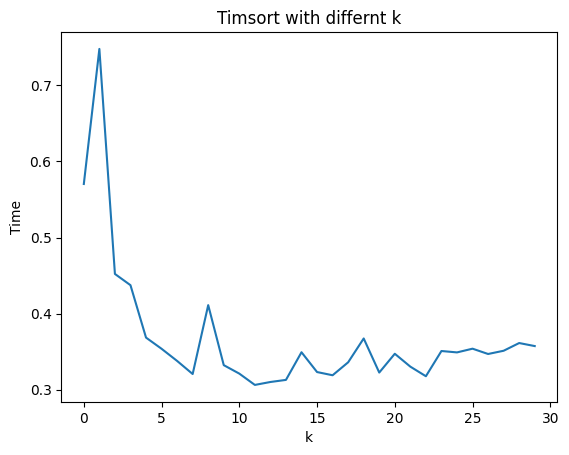

In [16]:
test_k = [j for j in range(0, 30, 1)]
test_k_output =[]

def TIMSORT(k):
    for i in range(1,100,5):
        array = np.random.randint(0, 2*i, size=i)
        Timsort(array, k)

for i in test_k:
    test_k_output.append(timeit.timeit(lambda: TIMSORT(i), number=100))

plt.plot(test_k, test_k_output)
print()
plt.xlabel('k')
plt.ylabel('Time') 
plt.title('Timsort with differnt k')
plt.show()